In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

 ## IMPORTING DATA

In [17]:
df=pd.read_csv("Datasets/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## PRE-PROCESSING DATA

In [18]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
df=df.drop(['Id'], axis = 1)

In [20]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [21]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
df.Species.value_counts()


Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

## VISUALIZING DATA

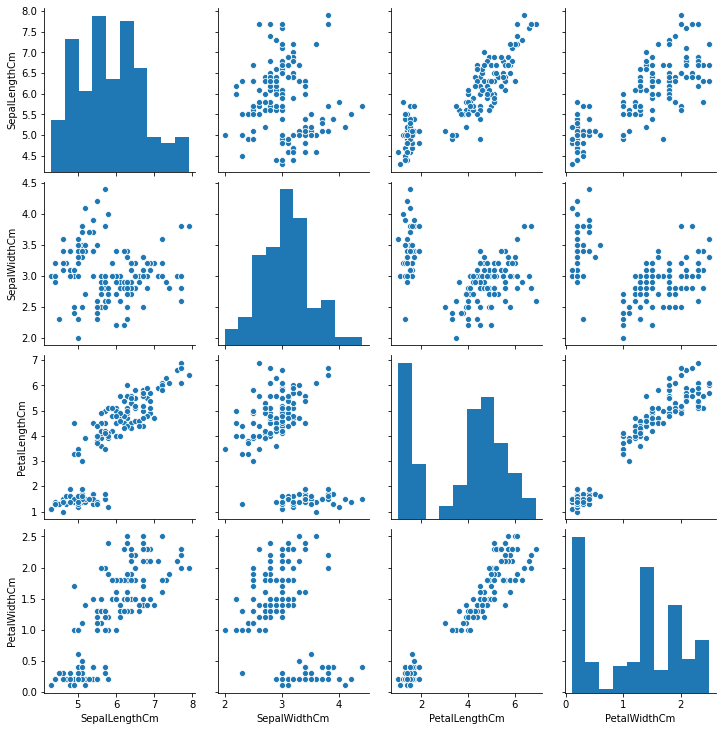

In [23]:
sns.pairplot(df)
plt.show()

In [24]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


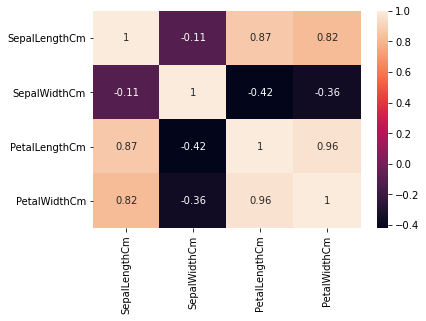

In [26]:
x=df.corr()
sns.heatmap(x,annot=True) #SET ANNOT TO TRUE T0 DIPLAY THE VALUE IN THE HEAT MAP
plt.show()

### SEPAL LENGTH VS WIDTH

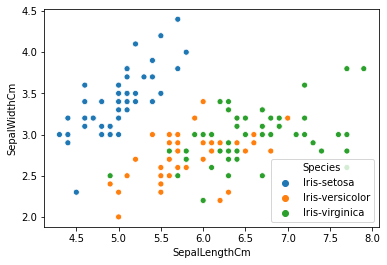

In [30]:
sns.color_palette("tab10")
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data=df,hue="Species")
plt.show()

### SEPAL LENGTH VS PETAL LENGTH

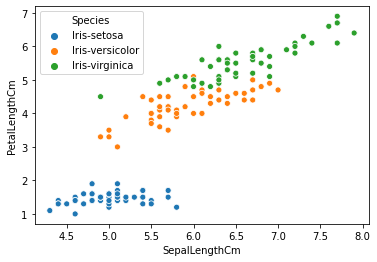

In [31]:
sns.scatterplot(x="SepalLengthCm",y="PetalLengthCm",data=df,hue="Species")
plt.show()

### SEPAL LENGTH VS PETAL WIDTH

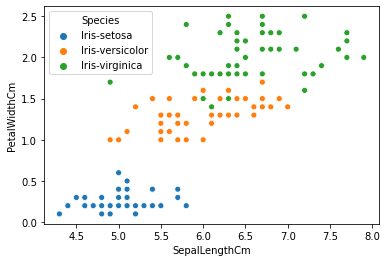

In [32]:
sns.scatterplot(x="SepalLengthCm",y="PetalWidthCm",data=df,hue="Species")
plt.show()

### SEPAL WIDTH VS PETAL LENGTH

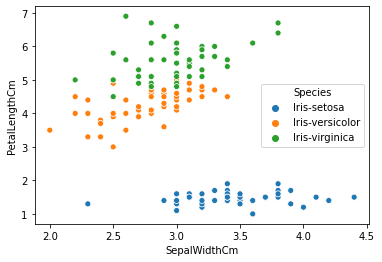

In [33]:
sns.scatterplot(x="SepalWidthCm",y="PetalLengthCm",data=df,hue="Species")
plt.show()

# LABEL ENCODING 

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
df["Species"]=le.fit_transform(df["Species"])

In [43]:
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# MODEL  TRAINING

In [45]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=["Species"])
y=df.Species
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=1)
logreg=LogisticRegression()
dc=DecisionTreeClassifier(max_depth=4)

classifiers=[("Logistic Regression",logreg),
             ("KNN",knn),
             ("Decision Tree Classifier",dc)]


for clf_name,clf in classifiers:
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    
    print(clf_name,"gives",accuracy_score(y_test,y_pred),"accuracy")
    

Logistic Regression gives 0.9777777777777777 accuracy
KNN gives 0.9777777777777777 accuracy
Decision Tree Classifier gives 0.9555555555555556 accuracy


C:\Users\91990\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
